In [ ]:
#CNN ALGORITHM ON CIFAR 100 DATASET 
%pylab inline
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

Populating the interactive namespace from numpy and matplotlib
169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
from keras.utils import to_categorical
to_categorical(y_train)[0, :].shape # number of categories

(100,)

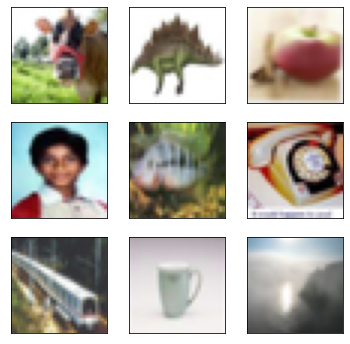

In [ ]:
def visualize_random_images(images):
    plt.figure(figsize=(6, 6))
    for ind, img in enumerate(images[:9, :]):
        plt.subplot(int("33%d" % (ind + 1)))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
visualize_random_images(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

Epoch 1/25
1563/1563 [==============================] - 12s 8ms/step - loss: 2.1018 - acc: 0.4589 - val_loss: 2.6684 - val_acc: 0.3539
Epoch 2/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0571 - acc: 0.4684 - val_loss: 2.6558 - val_acc: 0.3596
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0209 - acc: 0.4754 - val_loss: 2.6121 - val_acc: 0.3655
Epoch 4/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9789 - acc: 0.4850 - val_loss: 2.6575 - val_acc: 0.3582
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9400 - acc: 0.4947 - val_loss: 2.6440 - val_acc: 0.3615
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9068 - acc: 0.5013 - val_loss: 2.6992 - val_acc: 0.3562
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8790 - acc: 0.5072 - val_loss: 2.7142 - val_acc: 0.3575
Epoch 8/25
1563/1563 [==============================] -

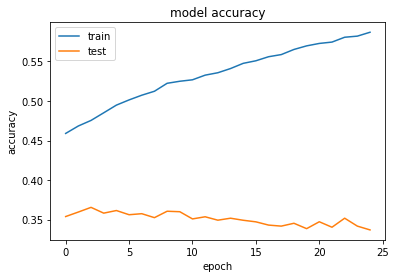

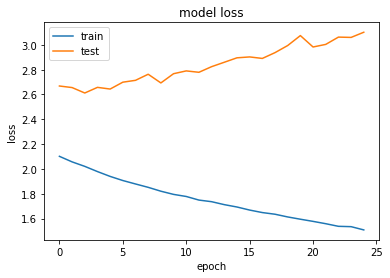

In [ ]:
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.preprocessing import normalize

from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse=False)
oh.fit(y_train)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train/255., oh.transform(y_train), epochs=25, batch_size=32,
          validation_data=(X_test/255., oh.transform(y_test)))

model.summary()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(X_train.shape[1:])))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

# train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

Epoch 1/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0817 - accuracy: 0.4450 - val_loss: 2.4620 - val_accuracy: 0.3887
Epoch 2/25
1563/1563 [==============================] - 15s 10ms/step - loss: 2.1052 - accuracy: 0.4401 - val_loss: 2.4182 - val_accuracy: 0.3969
Epoch 3/25
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0821 - accuracy: 0.4455 - val_loss: 2.3997 - val_accuracy: 0.4035
Epoch 4/25
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0688 - accuracy: 0.4498 - val_loss: 2.3260 - val_accuracy: 0.4154
Epoch 5/25
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0707 - accuracy: 0.4475 - val_loss: 2.4529 - val_accuracy: 0.3871
Epoch 6/25
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0558 - accuracy: 0.4522 - val_loss: 2.3539 - val_accuracy: 0.4051
Epoch 7/25
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0724 - accuracy: 0.4506 - val_loss: 2.3928 - 

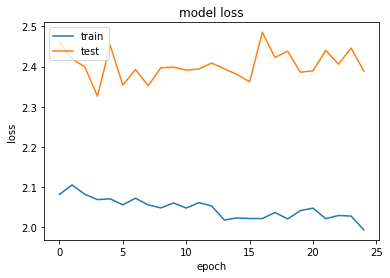

In [ ]:
history = model.fit(X_train/255., to_categorical(y_train), epochs=25, batch_size=32,
          validation_data=(X_test/255., to_categorical(y_test)))

print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
